# 01. Importing Libraries & Data

In [1]:
#### Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#### Define path
path = r'C:\Users\cemel\Documents\30-12-2023 Instacart Basket Analysis (Achievement 4)'

In [3]:
#### Import 'ordprod_pyviz_inclusions.pkl' data file
df_task2_include = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ordprod_pyviz_inclusions.pkl'))

In [4]:
#### Import 'departments_wrangled.csv' file created in Exercise 4.4 for later analysis
df_dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

## Check the Output and Prepare for Additional Processing (i.e. Merging)

In [5]:
df_dept.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [6]:
df_dept.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  21 non-null     int64 
 1   department  21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [7]:
df_task2_include.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,order_number,orders_day_of_week,time_of_day,days_since_prior_order,...,mean_order_frequency,order_frequency_flag,gender,state,age,dependants,family_status,income,region,exclusion_flag
user_id,,,,,,,,,,,,,,,,,,,,,
115,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7,8.4,3278419,9,4,18,4.0,...,10.0,Frequent Customer,Female,Idaho,77,3,married,98736,West,Include
138,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,28,6,11,3.0,...,8.0,Frequent Customer,Male,Minnesota,81,1,married,49620,Midwest,Include
138,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,30,6,17,20.0,...,8.0,Frequent Customer,Male,Minnesota,81,1,married,49620,Midwest,Include
225,9,Light Strawberry Blueberry Yogurt,120,16,7.0,169443,11,4,10,6.0,...,15.0,Regular customer,Female,Montana,76,3,married,69724,West,Include
295,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7,8.4,2287043,7,4,13,1.0,...,6.0,Frequent Customer,Male,Rhode Island,51,2,married,167566,Northeast,Include


In [8]:
df_task2_include.shape

(30964564, 29)

In [9]:
df_task2_include.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30964564 entries, 115 to 206202
Data columns (total 29 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   product_id              int32  
 1   product_name            object 
 2   aisle_id                int32  
 3   department_id           int8   
 4   prices                  float64
 5   order_id                int32  
 6   order_number            int8   
 7   orders_day_of_week      int8   
 8   time_of_day             int8   
 9   days_since_prior_order  float64
 10  add_to_cart_order       int32  
 11  reordered               int8   
 12  price_range_loc         object 
 13  busiest_days            object 
 14  busiest_period_of_day   object 
 15  max_order               int8   
 16  loyalty_flag            object 
 17  mean_product_price      float64
 18  spender_flag            object 
 19  mean_order_frequency    float64
 20  order_frequency_flag    object 
 21  gender                  object 
 2

# 02. Create a profiling variable based on age, income, certain goods in the 'department_id' column, and number of dependants.

## Preparatory Steps

In [10]:
#### Change the data type of the 'order_id' column in 'df_task2_include' to new type (str)
df_task2_include['order_id'] = df_task2_include['order_id'].astype('str')

In [11]:
#### Check for data type change
df_task2_include['order_id'].dtype

dtype('O')

In [12]:
#### Change the data type of the 'department_id' column in 'df_task2_include' to new type (str)
df_task2_include['department_id'] = df_task2_include['department_id'].astype('str')

In [13]:
#### Check for data type change
df_task2_include['department_id'].dtype

dtype('O')

In [14]:
#### Rename the column 'Unnamed: 0' to 'department_id'
df_dept.rename(columns={'Unnamed: 0': 'department_id'}, inplace=True)

In [15]:
#### Change the data type of the 'department_id' column in 'df_task2_include' to new type (str)
df_dept['department_id'] = df_dept['department_id'].astype('str')

In [16]:
#### Check for data type change
df_dept['department_id'].dtype

dtype('O')

### Merge 'df_task2_include' and 'df_dept' on 'department_id' column to enhance profile analysis

In [17]:
#### Merge 'df_task2_include' with 'df_dept'
df_task2_include_dptmerge = df_task2_include.merge(df_dept, on = 'department_id', indicator = True)

In [18]:
df_task2_include_dptmerge.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,order_number,orders_day_of_week,time_of_day,days_since_prior_order,...,gender,state,age,dependants,family_status,income,region,exclusion_flag,department,_merge
0,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7,8.4,3278419,9,4,18,4.0,...,Female,Idaho,77,3,married,98736,West,Include,beverages,both
1,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7,8.4,2287043,7,4,13,1.0,...,Male,Rhode Island,51,2,married,167566,Northeast,Include,beverages,both
2,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7,8.4,2511029,12,1,16,7.0,...,Male,Montana,22,3,married,48581,West,Include,beverages,both
3,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7,8.4,1357173,16,2,13,3.0,...,Male,North Carolina,67,0,divorced/widowed,124678,South,Include,beverages,both
4,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7,8.4,2901984,28,2,14,4.0,...,Male,North Carolina,67,0,divorced/widowed,124678,South,Include,beverages,both


In [19]:
#### Ensure all rows included via '.value_counts()'
df_task2_include_dptmerge['_merge'].value_counts()

_merge
both          30964564
left_only            0
right_only           0
Name: count, dtype: int64

## Begin Categorization for Profile Creation

### Categorization by Age

In [20]:
#### Compute aggregate statistics for the 'age' column and return the results as a new DataFrame 
df_task2_include_dptmerge.agg({'age': ['mean', 'min', 'max']})

,age
mean,49.468026
min,18.000000
max,81.000000


In [21]:
#### Create a function to categorize customers by age - age groups (young adult, adult, elderly adult)
df_task2_include_dptmerge.loc[df_task2_include_dptmerge['age'] >= 65, 'age_group'] = 'elderly adult'
df_task2_include_dptmerge.loc[(df_task2_include_dptmerge['age'] < 65) & (df_task2_include_dptmerge['age'] >= 25), 'age_group'] = 'adult'
df_task2_include_dptmerge.loc[(df_task2_include_dptmerge['age'] < 25) & (df_task2_include_dptmerge['age'] >= 18), 'age_group'] = 'young adult'

In [22]:
#### Check '.value_counts()' in 'age_group' column
df_task2_include_dptmerge['age_group'].value_counts(dropna = False)

age_group
adult            19353826
elderly adult     8195544
young adult       3415194
Name: count, dtype: int64

In [23]:
#### Ensure that the flag total is equal to the number of rows in 'df_task2_include'
19353826 + 8195544 + 3415194

30964564

#### Comments: All records successfully classified.

In [24]:
#### Ensure that categorization by age results were successful
df_task2_include_dptmerge[['age', 'age_group']].tail(50)

,age,age_group
30964514,36,adult
30964515,28,adult
30964516,28,adult
30964517,61,adult
30964518,53,adult
30964519,80,elderly adult
30964520,81,elderly adult
30964521,81,elderly adult
30964522,81,elderly adult
30964523,38,adult


### Categorization by Income

In [25]:
#### Compute aggregate statistics for the 'income' column and return the results as a new DataFrame
df_task2_include_dptmerge.agg({'income': ['mean', 'std', 'min', 'max']})

,income
mean,99675.865108
std,43141.865526
min,25903.000000
max,593901.000000


In [26]:
#### Determining range for an average income as one standard deviation above and below the mean
bottom_avg_inc = df_task2_include_dptmerge['income'].mean() - df_task2_include_dptmerge['income'].std()
top_avg_inc = df_task2_include_dptmerge['income'].mean() + df_task2_include_dptmerge['income'].std() 

In [27]:
print(bottom_avg_inc)
print(top_avg_inc)

56533.9995814751
142817.7306336185


In [28]:
#### Create a new column 'relative_income' in the DataFrame 'df_task2_include_dptmerge' and categorize each row based on the value in the 'income' column
df_task2_include_dptmerge.loc[df_task2_include_dptmerge['income'] >= 142818, 'relative_income'] = 'above average'
df_task2_include_dptmerge.loc[(df_task2_include_dptmerge['income'] < 142818) & (df_task2_include_dptmerge['income'] >= 56534), 'relative_income'] = 'average'
df_task2_include_dptmerge.loc[df_task2_include_dptmerge['income'] < 56534, 'relative_income'] = 'below average'

In [29]:
#### Check '.value_counts()' in 'relative_income' column
df_task2_include_dptmerge['relative_income'].value_counts(dropna = False)

relative_income
average          20923960
above average     5173082
below average     4867522
Name: count, dtype: int64

In [30]:
#### Ensure that the flag total is equal to the number of rows in 'df_task2_include'
20923960 + 5173082 + 4867522

30964564

In [31]:
#### Ensure that categorization by age results were successful
df_task2_include_dptmerge[['income', 'relative_income']].tail(50)

,income,relative_income
30964514,71375,average
30964515,84484,average
30964516,84484,average
30964517,152652,above average
30964518,106100,average
30964519,135208,average
30964520,101809,average
30964521,101809,average
30964522,101809,average
30964523,67166,average


### Categorization by Dependants

In [32]:
#### Create a new column 'presence_of_dependants' in the DataFrame 'df_task2_include_dptmerge' and categorize each row based on the value in the 'dependants' column
df_task2_include_dptmerge.loc[df_task2_include_dptmerge['dependants'] > 0, 'presence_of_dependants'] = 'present'
df_task2_include_dptmerge.loc[df_task2_include_dptmerge['dependants'] = 0, 'presence_of_dependants'] = 'absent'

In [33]:
#### Check '.value_counts()' in 'presence_of_dependants' column
df_task2_include_dptmerge['presence_of_dependants'].value_counts(dropna = False)

presence_of_dependants
present    23224883
absent      7739681
Name: count, dtype: int64

In [34]:
#### Ensure that the flag total is equal to the number of rows in 'df_task2_include'
23224883 + 7739681

30964564

In [35]:
#### Ensure that categorization by dependants results were successful
df_task2_include_dptmerge[['dependants', 'presence_of_dependants']].tail(50)

,dependants,presence_of_dependants
30964514,3,present
30964515,3,present
30964516,3,present
30964517,0,absent
30964518,2,present
30964519,2,present
30964520,3,present
30964521,3,present
30964522,3,present
30964523,0,absent


In [36]:
#### Check columns in updated dataframe ('df_task2_include_dptmerge')
for col in df_task2_include_dptmerge.columns:
    print(col)

product_id
product_name
aisle_id
department_id
prices
order_id
order_number
orders_day_of_week
time_of_day
days_since_prior_order
add_to_cart_order
reordered
price_range_loc
busiest_days
busiest_period_of_day
max_order
loyalty_flag
mean_product_price
spender_flag
mean_order_frequency
order_frequency_flag
gender
state
age
dependants
family_status
income
region
exclusion_flag
department
_merge
age_group
relative_income
presence_of_dependants


## Profile Creation by Family Status, Income and Presence of Dependants

### Initial Note: '...w/o dependants' in the following cells pertaining to profile creation is to be understood as 'absent from/not present in the household'.  

In [37]:
#### Create a profile tag for 'Non-married with below avg. income and dependants' 
df_task2_include_dptmerge.loc[(df_task2_include_dptmerge['family_status'] != 'married') & (df_task2_include_dptmerge['relative_income'] == 'below average') & (df_task2_include_dptmerge['presence_of_dependants'] == 'present'), 'customer_profile(status/income/dependants)'] = 'Non-Married-Below Avg Income-w/Dependants'

In [38]:
#### Create a profile tag for 'Non-married with avg. income and dependants' 
df_task2_include_dptmerge.loc[(df_task2_include_dptmerge['family_status'] != 'married') & (df_task2_include_dptmerge['relative_income'] == 'average') & (df_task2_include_dptmerge['presence_of_dependants'] == 'present'), 'customer_profile(status/income/dependants)'] = 'Non-Married-Avg Income-w/Dependants'

In [39]:
#### Create a profile tag for 'Non-married with above avg. income and dependants' 
df_task2_include_dptmerge.loc[(df_task2_include_dptmerge['family_status'] != 'married') & (df_task2_include_dptmerge['relative_income'] == 'above average') & (df_task2_include_dptmerge['presence_of_dependants'] == 'present'), 'customer_profile(status/income/dependants)'] = 'Non-Married-Above Avg Income-w/Dependants'

In [40]:
#### Create a profile tag for 'Non-married with below avg. income and no dependants' 
df_task2_include_dptmerge.loc[(df_task2_include_dptmerge['family_status'] != 'married') & (df_task2_include_dptmerge['relative_income'] == 'below average') & (df_task2_include_dptmerge['presence_of_dependants'] == 'absent'), 'customer_profile(status/income/dependants)'] = 'Non-Married-Below Avg Income-w/o Dependants'

In [41]:
#### Create a profile tag for 'Non-married with avg. income and no dependants' 
df_task2_include_dptmerge.loc[(df_task2_include_dptmerge['family_status'] != 'married') & (df_task2_include_dptmerge['relative_income'] == 'average') & (df_task2_include_dptmerge['presence_of_dependants'] == 'absent'), 'customer_profile(status/income/dependants)'] = 'Non-Married-Avg Income-w/o Dependants'

In [42]:
#### Create a profile tag for 'Non-married with above avg. income and no dependants' 
df_task2_include_dptmerge.loc[(df_task2_include_dptmerge['family_status'] != 'married') & (df_task2_include_dptmerge['relative_income'] == 'above average') & (df_task2_include_dptmerge['presence_of_dependants'] == 'absent'), 'customer_profile(status/income/dependants)'] = 'Non-Married-Above Avg Income-w/o Dependants'

In [43]:
#### Create a profile tag for 'Married with below avg. income and dependants' 
df_task2_include_dptmerge.loc[(df_task2_include_dptmerge['family_status'] == 'married') & (df_task2_include_dptmerge['relative_income'] == 'below average') & (df_task2_include_dptmerge['presence_of_dependants'] == 'present'), 'customer_profile(status/income/dependants)'] = 'Married-Below Avg Income-w/Dependants'

In [44]:
#### Create a profile tag for 'Married with avg. income and dependants' 
df_task2_include_dptmerge.loc[(df_task2_include_dptmerge['family_status'] == 'married') & (df_task2_include_dptmerge['relative_income'] == 'average') & (df_task2_include_dptmerge['presence_of_dependants'] == 'present'), 'customer_profile(status/income/dependants)'] = 'Married-Avg Income-w/Dependants'

In [45]:
#### Create a profile tag for 'Married with above avg. income and dependants' 
df_task2_include_dptmerge.loc[(df_task2_include_dptmerge['family_status'] == 'married') & (df_task2_include_dptmerge['relative_income'] == 'above average') & (df_task2_include_dptmerge['presence_of_dependants'] == 'present'), 'customer_profile(status/income/dependants)'] = 'Married-Above Avg Income-w/Dependants'

In [46]:
#### Create a profile tag for 'Married with below avg. income and no dependants' 
df_task2_include_dptmerge.loc[(df_task2_include_dptmerge['family_status'] == 'married') & (df_task2_include_dptmerge['relative_income'] == 'below average') & (df_task2_include_dptmerge['presence_of_dependants'] == 'absent'), 'customer_profile(status/income/dependants)'] = 'Married-Below Avg Income-w/o Dependants'

In [47]:
#### Create a profile tag for 'Married with avg. income and no dependants' 
df_task2_include_dptmerge.loc[(df_task2_include_dptmerge['family_status'] == 'married') & (df_task2_include_dptmerge['relative_income'] == 'average') & (df_task2_include_dptmerge['presence_of_dependants'] == 'absent'), 'customer_profile(status/income/dependants)'] = 'Married-Avg Income-w/o Dependants'

In [48]:
#### Create a profile tag for 'Married with above avg. income and no dependants' 
df_task2_include_dptmerge.loc[(df_task2_include_dptmerge['family_status'] == 'married') & (df_task2_include_dptmerge['relative_income'] == 'above average') & (df_task2_include_dptmerge['presence_of_dependants'] == 'absent'), 'customer_profile(status/income/dependants)'] = 'Married-Above Avg Income-w/o Dependants'

In [49]:
#### Check '.value_counts()' in 'customer_profile(status/income/dependants)' column
df_task2_include_dptmerge['customer_profile(status/income/dependants)'].value_counts(dropna = False)

customer_profile(status/income/dependants)
Married-Avg Income-w/Dependants                14626870
Non-Married-Avg Income-w/o Dependants           5209128
Married-Above Avg Income-w/Dependants           3843248
Married-Below Avg Income-w/Dependants           3273593
Non-Married-Above Avg Income-w/o Dependants     1313889
Non-Married-Below Avg Income-w/o Dependants     1216664
Non-Married-Avg Income-w/Dependants             1087962
Non-Married-Below Avg Income-w/Dependants        377265
Non-Married-Above Avg Income-w/Dependants         15945
Name: count, dtype: int64

In [50]:
#### Ensure that the flag total is equal to the number of rows in 'df_task2_include'
14626870 + 5209128 + 3843248 + 3273593 + 1313889 + 1216664 + 1087962 + 377265 + 15945

30964564

#### Comments: It appears that all the records have been appropriately categorized for the customer profile creation. Interestingly, customers who fit the characteristics of 'Married, w/o dependants' did not appear. The reason for this occurrence is not entirely clear. 

## Profile Creation by Age and Income

In [51]:
#### Create a profile tag for Young Adult w/Below Avg Income
df_task2_include_dptmerge.loc[(df_task2_include_dptmerge['age_group'] == 'young adult') & (df_task2_include_dptmerge['relative_income'] == 'below average'), 'customer_profile(age/income)'] = 'Young Adult w/Below Avg Income'

In [52]:
#### Create a profile tag for Young Adult w/Avg Income
df_task2_include_dptmerge.loc[(df_task2_include_dptmerge['age_group'] == 'young adult') & (df_task2_include_dptmerge['relative_income'] == 'average'), 'customer_profile(age/income)'] = 'Young Adult w/Avg Income'

In [53]:
#### Create a profile tag for Young Adult w/Above Avg Income
df_task2_include_dptmerge.loc[(df_task2_include_dptmerge['age_group'] == 'young adult') & (df_task2_include_dptmerge['relative_income'] == 'above average'), 'customer_profile(age/income)'] = 'Young Adult w/Above Avg Income'

In [54]:
#### Create a profile tag for Adult w/Below Avg Income
df_task2_include_dptmerge.loc[(df_task2_include_dptmerge['age_group'] == 'adult') & (df_task2_include_dptmerge['relative_income'] == 'below average'), 'customer_profile(age/income)'] = 'Adult w/Below Avg Income'

In [55]:
#### Create a profile tag for Adult w/Avg Income
df_task2_include_dptmerge.loc[(df_task2_include_dptmerge['age_group'] == 'adult') & (df_task2_include_dptmerge['relative_income'] == 'average'), 'customer_profile(age/income)'] = 'Adult w/Avg Income'

In [56]:
#### Create a profile tag for Adult w/Above Avg Income
df_task2_include_dptmerge.loc[(df_task2_include_dptmerge['age_group'] == 'adult') & (df_task2_include_dptmerge['relative_income'] == 'above average'), 'customer_profile(age/income)'] = 'Adult w/Above Avg Income'

In [57]:
#### Create a profile tag for Elderly Adult w/Below Avg Income
df_task2_include_dptmerge.loc[(df_task2_include_dptmerge['age_group'] == 'elderly adult') & (df_task2_include_dptmerge['relative_income'] == 'below average'), 'customer_profile(age/income)'] = 'Elderly Adult w/Below Avg Income'

In [58]:
#### Create a profile tag for Elderly Adult w/Avg Income
df_task2_include_dptmerge.loc[(df_task2_include_dptmerge['age_group'] == 'elderly adult') & (df_task2_include_dptmerge['relative_income'] == 'average'), 'customer_profile(age/income)'] = 'Elderly Adult w/Avg Income'

In [59]:
#### Create a profile tag for Elderly Adult w/Above Avg Income
df_task2_include_dptmerge.loc[(df_task2_include_dptmerge['age_group'] == 'elderly adult') & (df_task2_include_dptmerge['relative_income'] == 'above average'), 'customer_profile(age/income)'] = 'Elderly Adult w/Above Avg Income'

In [60]:
#### Check '.value_counts()' in 'customer_profile(age/income)' column
df_task2_include_dptmerge['customer_profile(age/income)'].value_counts(dropna = False)

customer_profile(age/income)
Adult w/Avg Income                  13142930
Elderly Adult w/Avg Income           5274616
Adult w/Below Avg Income             3161112
Adult w/Above Avg Income             3049784
Young Adult w/Avg Income             2506414
Elderly Adult w/Above Avg Income     2088431
Young Adult w/Below Avg Income        873913
Elderly Adult w/Below Avg Income      832497
Young Adult w/Above Avg Income         34867
Name: count, dtype: int64

In [61]:
#### Ensure that the flag total is equal to the number of rows in 'df_task2_include'
13142930 + 5274616 + 3161112 + 3049784 + 2506414 + 2088431 + 873913 + 832497 + 34867

30964564

#### Comments: It appears that all the records have been appropriately categorized for the customer profile creation.

# 03. Create an appropriate visualization to show the distribution of profiles.

[Text(0.5, 0, 'number of customers'),
 Text(0, 0.5, 'customer profile'),
 Text(0.5, 1.0, 'customer profile distribution')]

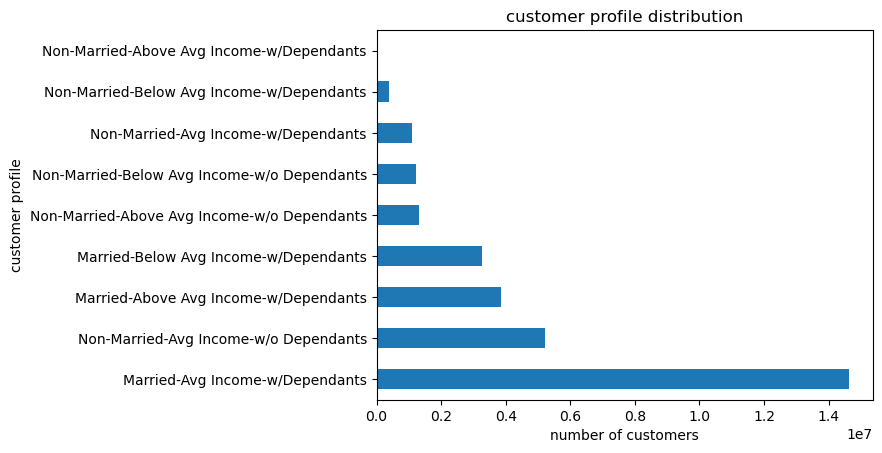

In [62]:
# Create a bar chart showing how many people are in each 'family status/income/dependants' profile
bar_profiles_SID = df_task2_include_dptmerge['customer_profile(status/income/dependants)'].value_counts().plot.barh()

# Add labels and title to chart
bar_profiles_SID.set(xlabel='number of customers', ylabel='customer profile', title='customer profile distribution')

In [63]:
#### Export the bar chart
bar_profiles_SID.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_profiles_SID.png'), bbox_inches = 'tight')

[Text(0.5, 0, 'number of customers'),
 Text(0, 0.5, 'customer profile'),
 Text(0.5, 1.0, 'customer profile distribution')]

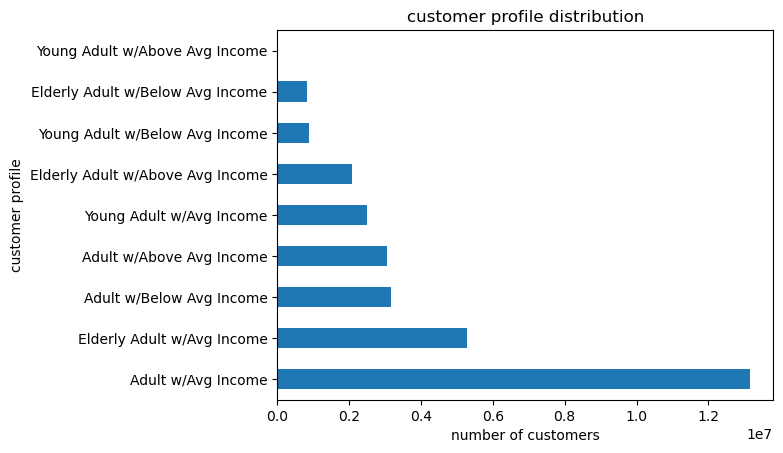

In [64]:
#### Create a bar chart showing how many people are in each 'age/income' profile
bar_profiles_AI = df_task2_include_dptmerge['customer_profile(age/income)'].value_counts().plot.barh()

#### Add labels and a title 
bar_profiles_AI.set(xlabel='number of customers', ylabel='customer profile', title='customer profile distribution')

In [65]:
#### Export the bar chart
bar_profiles_AI.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_profiles_AI.png'), bbox_inches = 'tight')

# 04. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [66]:
#### Aggregate three descriptive stats for the 'status/income/dependants' profiles - specifically for 'days_since_prior_order' to show usage frequency & expenditure
df_task2_include_dptmerge.groupby('customer_profile(status/income/dependants)').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                                              mean  min   max
customer_profile(status/income/dependants)                                   
Married-Above Avg Income-w/Dependants                    10.749271  0.0  30.0
Married-Avg Income-w/Dependants                          10.771824  0.0  30.0
Married-Below Avg Income-w/Dependants                    11.125317  0.0  30.0
Non-Married-Above Avg Income-w/Dependants                 8.994808  0.0  30.0
Non-Married-Above Avg Income-w/o Dependants              10.655653  0.0  30.0
Non-Married-Avg Income-w/Dependants                      10.694274  0.0  30.0
Non-Married-Avg Income-w/o Dependants                    10.755871  0.0  30.0
Non-Married-Below Avg Income-w/Dependants                10.990936  0.0  30.0
Non-Married-Below Avg Income-w/o Dependants              11.094831  0.0  30.0

In [67]:
#### Aggregate three descriptive stats for the 'status/income/dependants' profiles - specifically for 'prices' to show usage frequency & expenditure
df_task2_include_dptmerge.groupby('customer_profile(status/income/dependants)').agg({'prices': ['mean', 'min', 'max']})

prices              
                                                   mean  min      max
customer_profile(status/income/dependants)                           
Married-Above Avg Income-w/Dependants         26.548521  1.0  99999.0
Married-Avg Income-w/Dependants                9.228891  1.0  99999.0
Married-Below Avg Income-w/Dependants          6.932147  1.0     25.0
Non-Married-Above Avg Income-w/Dependants    182.079837  1.0  99999.0
Non-Married-Above Avg Income-w/o Dependants   26.831838  1.0  99999.0
Non-Married-Avg Income-w/Dependants            9.611463  1.0  99999.0
Non-Married-Avg Income-w/o Dependants          9.584537  1.0  99999.0
Non-Married-Below Avg Income-w/Dependants      7.342429  1.0     25.0
Non-Married-Below Avg Income-w/o Dependants    6.977742  1.0     25.0

In [68]:
#### Aggregate three descriptive stats for the 'age/income' profiles - specifically for 'days_since_prior_order' to show usage frequency & expenditure
df_task2_include_dptmerge.groupby('customer_profile(age/income)').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                                   mean  min   max
customer_profile(age/income)                                      
Adult w/Above Avg Income                      10.728999  0.0  30.0
Adult w/Avg Income                            10.774900  0.0  30.0
Adult w/Below Avg Income                      11.136203  0.0  30.0
Elderly Adult w/Above Avg Income              10.719344  0.0  30.0
Elderly Adult w/Avg Income                    10.768556  0.0  30.0
Elderly Adult w/Below Avg Income              11.122190  0.0  30.0
Young Adult w/Above Avg Income                 9.977269  0.0  30.0
Young Adult w/Avg Income                      10.695739  0.0  30.0
Young Adult w/Below Avg Income                10.988447  0.0  30.0

In [69]:
#### Aggregate three descriptive stats for the 'age/income' profiles - specifically for 'prices' to show usage frequency & expenditure
df_task2_include_dptmerge.groupby('customer_profile(age/income)').agg({'prices': ['mean', 'min', 'max']})

prices              
                                        mean  min      max
customer_profile(age/income)                              
Adult w/Above Avg Income           28.558830  1.0  99999.0
Adult w/Avg Income                  9.237591  1.0  99999.0
Adult w/Below Avg Income            7.005990  1.0     25.0
Elderly Adult w/Above Avg Income   20.486264  1.0  99999.0
Elderly Adult w/Avg Income          9.130615  1.0  99999.0
Elderly Adult w/Below Avg Income    6.506539  1.0     25.0
Young Adult w/Above Avg Income    295.622113  1.0  99999.0
Young Adult w/Avg Income           10.295300  1.0  99999.0
Young Adult w/Below Avg Income      7.311074  1.0     25.0

# 05. Compare your customer profiles with regions and departments and try to identify a link between them.

## 'status/income/dependants' profile vs. 'region'

In [70]:
#### Creating a crosstab for analysis
pivot_profiles_SID_region = pd.crosstab(df_task2_include_dptmerge['region'], df_task2_include_dptmerge['customer_profile(status/income/dependants)'], dropna = False)

#### View results of crosstab 
pivot_profiles_SID_region

customer_profile(status/income/dependants),Married-Above Avg Income-w/Dependants,Married-Avg Income-w/Dependants,Married-Below Avg Income-w/Dependants,Non-Married-Above Avg Income-w/Dependants,Non-Married-Above Avg Income-w/o Dependants,Non-Married-Avg Income-w/Dependants,Non-Married-Avg Income-w/o Dependants,Non-Married-Below Avg Income-w/Dependants,Non-Married-Below Avg Income-w/o Dependants
region,,,,,,,,,
Midwest,917539,3409380,760343,3115,300731,260226,1253567,88094,268518
Northeast,679486,2604778,569509,774,229445,195730,901470,59926,223567
South,1257461,4852908,1113380,8334,437643,368086,1727917,129037,416373
West,988762,3759804,830361,3722,346070,263920,1326174,100208,308206


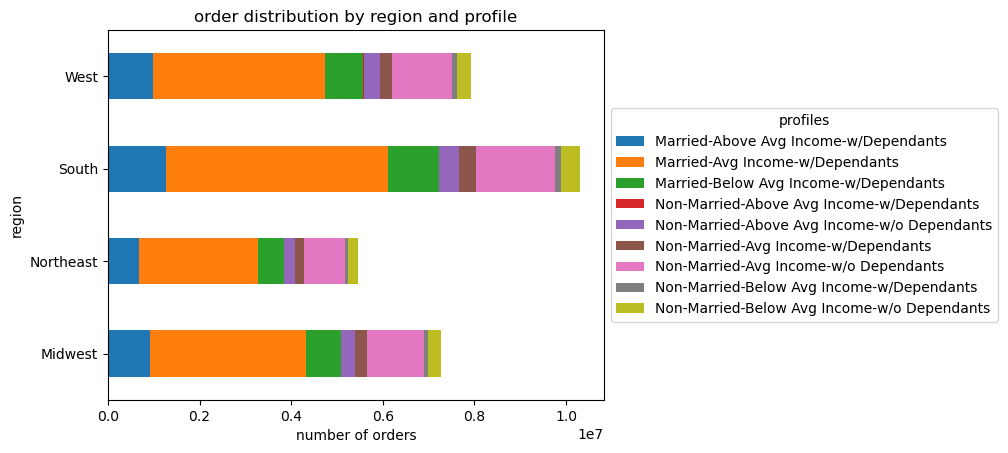

In [71]:
#### Create clustered bar chart by region and SID profile
bar_profiles_SID_region = pivot_profiles_SID_region.plot.barh(stacked=True)

#### Add labels and a title
bar_profiles_SID_region.set(xlabel='number of orders', ylabel='region', title='order distribution by region and profile')
bar_profiles_SID_region.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='profiles')

In [72]:
#### Export the bar chart
bar_profiles_SID_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_profiles_SID_region.png'), bbox_inches = 'tight')

## 'status/income/dependants' profile vs. 'dept'

In [73]:
#### Creating a crosstab for analysis
pivot_profiles_SID_dept = pd.crosstab(df_task2_include_dptmerge['department'], df_task2_include_dptmerge['customer_profile(status/income/dependants)'], dropna = False)

#### View results of crosstab 
pivot_profiles_SID_dept

customer_profile(status/income/dependants),Married-Above Avg Income-w/Dependants,Married-Avg Income-w/Dependants,Married-Below Avg Income-w/Dependants,Non-Married-Above Avg Income-w/Dependants,Non-Married-Above Avg Income-w/o Dependants,Non-Married-Avg Income-w/Dependants,Non-Married-Avg Income-w/o Dependants,Non-Married-Below Avg Income-w/Dependants,Non-Married-Below Avg Income-w/o Dependants
department,,,,,,,,,
alcohol,21508,61776,16137,470,7519,5844,23505,2065,5803
babies,52247,204001,31435,225,18916,15162,72621,3994,11791
bakery,146097,532664,106988,673,48761,40031,193517,12980,39117
beverages,307194,1149834,350425,1233,105401,82336,411301,35538,128639
breakfast,82035,303673,85512,380,27158,23200,107988,9618,31286
bulk,3649,15713,4456,2,1274,1233,5266,398,1460
canned goods,132642,495812,84123,672,44015,36527,175419,11278,31586
dairy eggs,652019,2482191,498389,2923,222168,187335,881926,59949,190282
deli,124597,475036,102700,406,42485,35162,171556,12551,39341


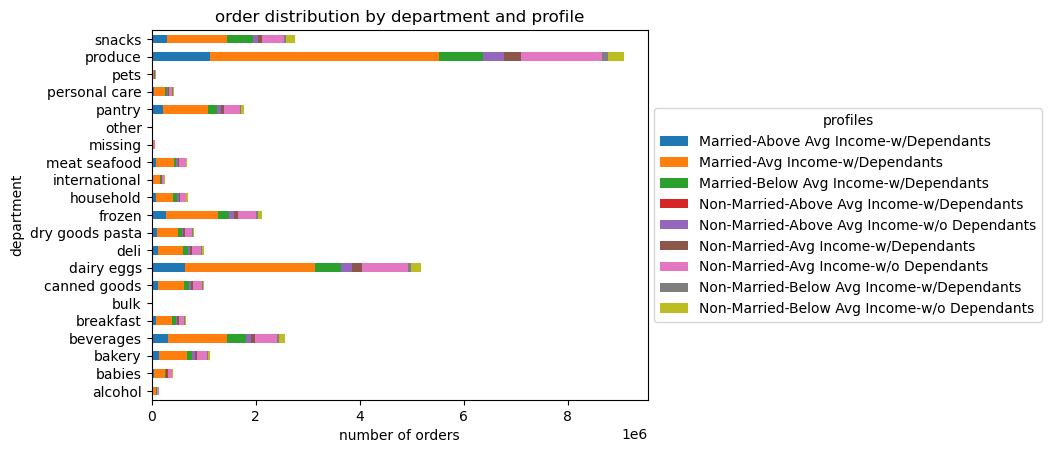

In [74]:
#### Create clustered bar chart by department and SID profile
bar_profiles_SID_dept = pivot_profiles_SID_dept.plot.barh(stacked=True)

#### Add labels and a title
bar_profiles_SID_dept.set(xlabel='number of orders', ylabel='department', title='order distribution by department and profile')
bar_profiles_SID_dept.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='profiles')

In [75]:
#### Export the bar chart
bar_profiles_SID_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_profiles_SID_dept.png'), bbox_inches = 'tight')

## 'status/income/dependants' profile vs. 'frequency'

In [76]:
#### Creating a crosstab for analysis
pivot_profiles_SID_freq = pd.crosstab(df_task2_include_dptmerge['order_frequency_flag'], df_task2_include_dptmerge['customer_profile(status/income/dependants)'], dropna = False)

#### View results of crosstab 
pivot_profiles_SID_freq

customer_profile(status/income/dependants),Married-Above Avg Income-w/Dependants,Married-Avg Income-w/Dependants,Married-Below Avg Income-w/Dependants,Non-Married-Above Avg Income-w/Dependants,Non-Married-Above Avg Income-w/o Dependants,Non-Married-Avg Income-w/Dependants,Non-Married-Avg Income-w/o Dependants,Non-Married-Below Avg Income-w/Dependants,Non-Married-Below Avg Income-w/o Dependants
order_frequency_flag,,,,,,,,,
Frequent Customer,2654560,10069657,2164608,13612,907578,757886,3574037,259016,803522
Non_frequent_customer,345369,1333911,360543,413,117495,98850,469734,39383,129277
Regular customer,843319,3223302,748442,1920,288816,231226,1165357,78866,283865


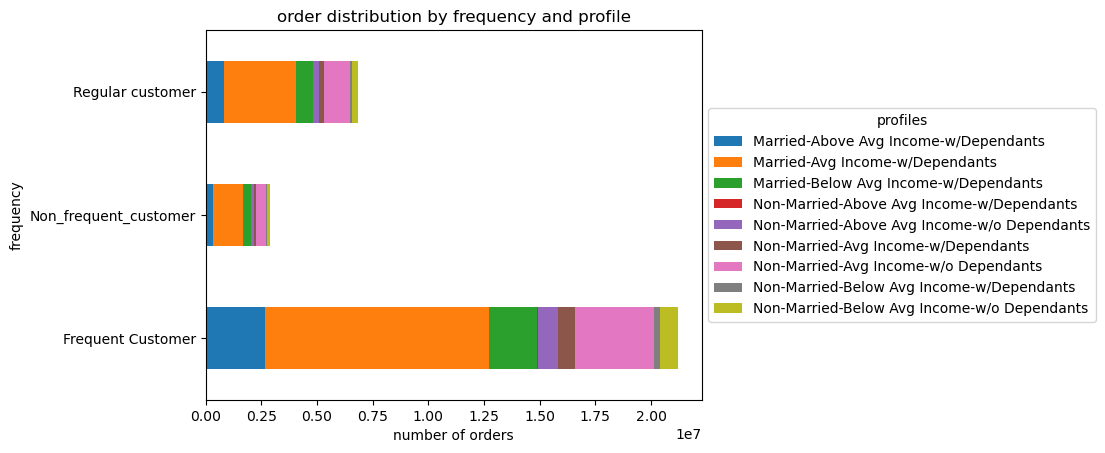

In [77]:
#### Create clustered bar chart by frequency and SID profile
bar_profiles_SID_freq = pivot_profiles_SID_freq.plot.barh(stacked=True)

#### Add labels and a title
bar_profiles_SID_freq.set(xlabel='number of orders', ylabel='frequency', title='order distribution by frequency and profile')
bar_profiles_SID_freq.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='profiles')

In [78]:
#### Export the bar chart
bar_profiles_SID_freq.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_profiles_SID_freq.png'), bbox_inches = 'tight')

## 'status/income/dependants' profile vs. 'price range'

In [79]:
#### Creating a crosstab for analysis
pivot_profiles_SID_price = pd.crosstab(df_task2_include_dptmerge['price_range_loc'], df_task2_include_dptmerge['customer_profile(status/income/dependants)'], dropna = False)

#### View results of crosstab 
pivot_profiles_SID_price

customer_profile(status/income/dependants),Married-Above Avg Income-w/Dependants,Married-Avg Income-w/Dependants,Married-Below Avg Income-w/Dependants,Non-Married-Above Avg Income-w/Dependants,Non-Married-Above Avg Income-w/o Dependants,Non-Married-Avg Income-w/Dependants,Non-Married-Avg Income-w/o Dependants,Non-Married-Below Avg Income-w/Dependants,Non-Married-Below Avg Income-w/o Dependants
price_range_loc,,,,,,,,,
High-range product,56289,203225,21987,373,18231,14877,71075,3747,8149
Low-range product,1145207,4363442,1285146,4655,391902,323305,1554459,133847,472877
Mid-range product,2641752,10060203,1966460,10917,903756,749780,3583594,239671,735638


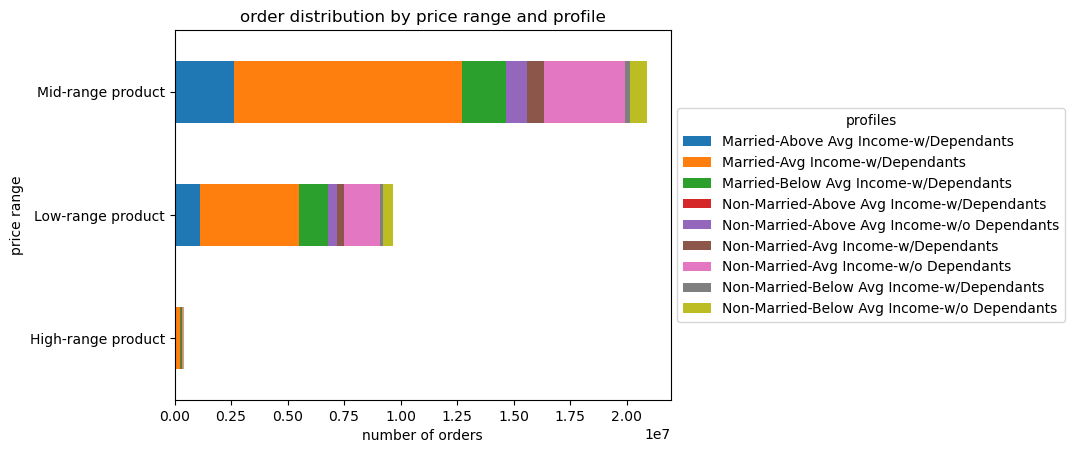

In [80]:
#### Create clustered bar chart by price range and SID profile
bar_profiles_SID_price = pivot_profiles_SID_price.plot.barh(stacked=True)

#### Add labels and a title
bar_profiles_SID_price.set(xlabel='number of orders', ylabel='price range', title='order distribution by price range and profile')
bar_profiles_SID_price.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='profiles')

In [81]:
#### Export the bar chart
bar_profiles_SID_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_profiles_SID_price.png'), bbox_inches = 'tight')

## 'status/income/dependants' profile vs. 'loyalty'

In [82]:
#### Creating a crosstab for analysis
pivot_profiles_SID_loyalty = pd.crosstab(df_task2_include_dptmerge['loyalty_flag'], df_task2_include_dptmerge['customer_profile(status/income/dependants)'], dropna = False)

#### View results of crosstab 
pivot_profiles_SID_loyalty

customer_profile(status/income/dependants),Married-Above Avg Income-w/Dependants,Married-Avg Income-w/Dependants,Married-Below Avg Income-w/Dependants,Non-Married-Above Avg Income-w/Dependants,Non-Married-Above Avg Income-w/o Dependants,Non-Married-Avg Income-w/Dependants,Non-Married-Avg Income-w/o Dependants,Non-Married-Below Avg Income-w/Dependants,Non-Married-Below Avg Income-w/o Dependants
loyalty_flag,,,,,,,,,
Loyal customer,1276251,4905904,1020345,7947,448306,366298,1758039,118504,382499
New customer,582121,2214223,584307,737,196058,159159,784414,61883,220793
Regular customer,1984876,7506743,1668941,7261,669525,562505,2666675,196878,613372


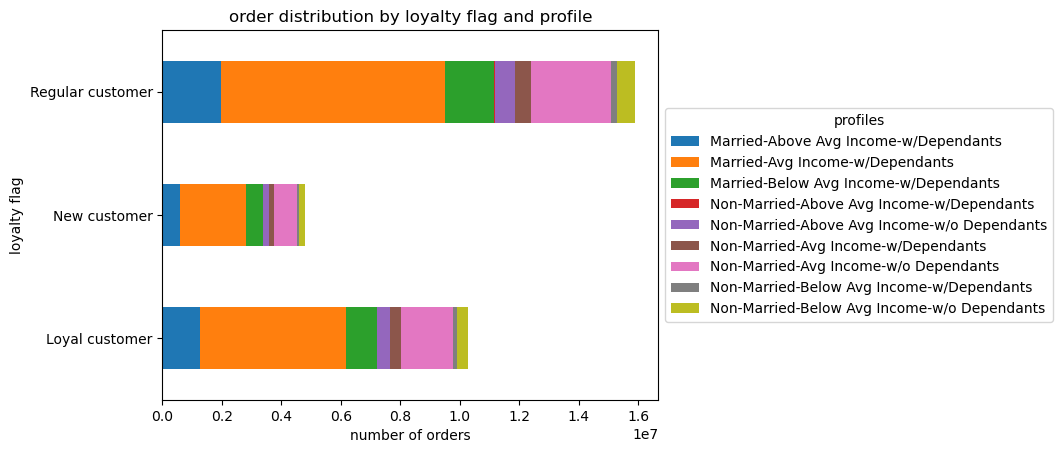

In [83]:
#### Create clustered bar chart by loyalty flag and SID profile
bar_profiles_SID_loyalty = pivot_profiles_SID_loyalty.plot.barh(stacked=True)

#### Add labels and a title
bar_profiles_SID_loyalty.set(xlabel='number of orders', ylabel='loyalty flag', title='order distribution by loyalty flag and profile')
bar_profiles_SID_loyalty.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='profiles')

In [84]:
#### Export the bar chart
bar_profiles_SID_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_profiles_SID_loyalty.png'), bbox_inches = 'tight')

# Dataframe Check and Export

In [85]:
df_task2_include_dptmerge.shape

(30964564, 36)

In [86]:
#### Export new dataframe as pkl file
df_task2_include_dptmerge.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ordprod_final(Ach 4).pkl'))